# RP3 Strategy
Classic volatility targetted risk premia strategy using 3 instruments

Define imports and strategy parameters

In [118]:
import datetime
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Map asset class to instrument
equity_ticker = 'VNRT.L'
bond_ticker = 'IBTL.L'
gold_ticker = 'SGLN.L'
universe_tickers = [equity_ticker, bond_ticker, gold_ticker]

# Volatility targets for each asset class
equity_vol_target = 0.3
bond_vol_target = 0.3
gold_vol_target = 0.3

# Calendar days to load data for each asset class
hist_price_period_days = 365

# Day periods to use for volatility estimation
vol_forecast_period_days = 60

portfolio_value = 1000

Load historic adjusted close prices for our universe for last x days covering the volatility forecast period

In [119]:
# Set period to load data, noting these are calendar days not trading days
period = datetime.date.today()
period_start = period - datetime.timedelta(days=hist_price_period_days)

# Get daily adjusted close data from Yahoo Finance for our universe
prices_df = pdr.get_data_yahoo(universe_tickers, start=period_start, end=period)[['Adj Close']]
#for ticker in universe_tickers:
 #   tmp_df = pdr.get_data_yahoo(ticker, start=period_start, end=period)[['Adj Close']]
  #  tmp_df['Ticker'] = ticker
   # prices_df = pd.concat([prices_df, tmp_df])

# Validate data
#print(prices_df.tail(5))
#print(prices_df.isnull().sum())
#print(prices_df.groupby('ticker')['adj_close'].agg(['count']))

# Standardize col names
#prices_df.index = prices_df.index.rename('date')
#prices_df.columns = ['price', 'ticker']

# Flatten the columns multi-index
#prices_df = prices_df.pivot_table(index='date', columns='ticker', values=['price'])
#prices_df.columns = [col[1] for col in prices_df.columns.values]

prices_df = prices_df.rename_axis(columns={'Attributes': 'attribute', 'Symbols': 'ticker'})
prices_df = prices_df.rename_axis(index={'Date': 'date'})
prices_df = prices_df.rename(columns={'Adj Close': 'price'})

#prices_df = prices_df.rename(str.lower, axis='columns')


prices_df['return', 'VNRT.L'] = prices_df['price', 'VNRT.L'].pct_change()

print(prices_df.index.names)

print(prices_df.columns)

prices_df


['date']
MultiIndex([( 'price', 'VNRT.L'),
            ( 'price', 'IBTL.L'),
            ( 'price', 'SGLN.L'),
            ('return', 'VNRT.L')],
           names=['attribute', 'ticker'])


attribute       price                        return
ticker         VNRT.L      IBTL.L  SGLN.L    VNRT.L
date                                               
2021-08-23  81.177498  407.950012  2567.0       NaN
2021-08-24  81.332497  406.424988  2569.0  0.001909
2021-08-25  81.504997  402.325012  2542.0  0.002121
2021-08-26  81.254997  402.100006  2552.5 -0.003067
2021-08-27  81.422501  403.225006  2564.0  0.002061
...               ...         ...     ...       ...
2022-08-15  86.407501  357.500000  2872.5  0.008962
2022-08-16  86.877502  353.450012  2859.0  0.005439
2022-08-17  86.489998  353.149994  2853.0 -0.004460
2022-08-18  87.097504  356.899994  2860.0  0.007024
2022-08-19  87.324997  354.649994  2885.0  0.002612

[251 rows x 4 columns]

Enrich our dataframe of historic prices with further metrics required by the strategy

In [120]:
prices_df['return'] = prices_df['adj_close'].pct_change()
prices_df['log_return'] = np.log(prices_df['adj_close']/prices_df['adj_close'].shift(1))
prices_df['cum_return'] = (1 + prices_df['return']).cumprod() - 1
prices_df['cum_log_return'] = prices_df['log_return'].cumsum()
prices_df = prices_df.dropna()


print(prices_df.head(5))

KeyError: 'adj_close'

Now compute unconstrained position sizes based on annualized volatility for each instrument

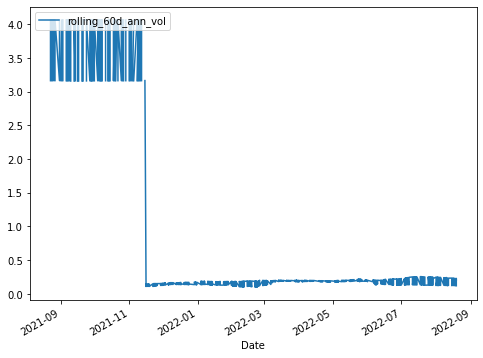

In [ ]:
prices_df['rolling_30d_ann_vol'] = prices_df['log_return'].rolling(30).std() * math.sqrt(252)
prices_df['rolling_60d_ann_vol'] = prices_df['log_return'].rolling(60).std() * math.sqrt(252)
prices_df['rolling_90d_ann_vol'] = prices_df['log_return'].rolling(90).std() * math.sqrt(252)
#prices_last_price = prices_df['Adj Close'].tail(1).values[0]
#prices_size = (prices_vol_target / prices_ann_vol) * (portfolio_value / prices_last_price)

#print(prices_ann_vol)
#print(prices_last_price)
#print(prices_size)

prices_df['rolling_60d_ann_vol'].plot(figsize=(8,6))
plt.legend(loc=2)